In [1]:
import pandas as pd
import numpy as np
import re
from pandas import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [152]:
data_ferrous = pd.read_json(r"C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\02_Extracted Data\Version 3\RawDataset_ferrous.json")
data_nonferrous = pd.read_json(r"C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\02_Extracted Data\Version 3\RawDataset_nonferrous.json")
data_powdermetallurgy = pd.read_json(r"C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\02_Extracted Data\Version 3\RawDataset_powdermetallurgy.json")

# User defined functions for data cleaning

In [153]:
# Function to remove text and keep only numbers
def keep_only_numbers(cell):
 if pd.isna(cell) or cell is None:
     return None
 numbers = re.findall(r'-?\s?\d+(?:\.\d+)?', str(cell))
 if numbers:
     numbers[0] = numbers[0].replace(' ','')
     return float(numbers[0])
 else:
     return None

In [154]:
# Function to keep only alphabetical characters
def keep_only_alphabets(cell):
 if pd.isna(cell) or cell is None:
     return None
 text = re.sub(r'[^a-zA-Z]', '', cell)
 if text:
    return text.strip()
 else:
    return None

In [155]:
# Function to normalise the dictonary entries
def normalise_dic(df,col):
    df_normalised = json_normalize(df[col]) 
    #print(df_normalised.columns)
    df = pd.concat((df,df_normalised), axis=1)
    return df

In [156]:
def find_string(input_string,key_list):
    if input_string is not None:
        input_string = str(input_string)
        condition = False
        for key in key_list:
            condition = True
            if key in input_string:      # If key is found
                return key
        if condition == False:
            return None
    else:
        return None 

In [157]:
def number_extraction_afterstring(input_string, key):
    if input_string is not None:
        input_string = str(input_string)
        key_index = input_string.find(key)
        
        if key_index != -1:                                                   # If key is found
            value = ""                                                        # Extract the value after the key
            for char in input_string[key_index + len(key):]:
                if char.isdigit() or char == '.':
                    value += char
                else:
                    break                                                     # Terminate the loop if a non-numeric character is detected
            if value:                                                         # Check if a value was extracted
                return value                                                  # Convert the value to a float
            else:
                return None                                                   # Return None if no numerical value is found
        else:
            return None                                                       # Return None if key is not found
    else:
        return None                                                           # Return None if input_string is None

In [158]:
def find_string_values(input_string,key_list):
    if input_string is not None:
        input_string = str(input_string)
        condition = False
        for key in key_list:
            key_with_space = key + " "
            key_index = input_string.find(key_with_space)                        # Find the index of the key followed by colon
            
            if key_index != -1:                                                  # If key is found
                condition = True
                value = ""                                                       # Extract the value after the key
                for char in input_string[key_index + len(key_with_space):]:
                    if char.isdigit() or char.isalpha():
                        value += char
                    else:
                        break                                                    # Terminate the loop if a non-numeric or non-alphabetic character is detected
                return key, value
                
        if condition == False:
            return None,None
    

def get_string_values(df,col,col1,col2,key_list):
    df[col] = df[col].str.replace('\n','')
    for i in range(len(df)):
        if df[col][i] is not None:
            a, b = find_string_values(df[col][i],key_list)
            df.loc[i,col1] = a
            df.loc[i,col2] = b

# Data cleaning for each column in dataframe

Column : All_Series

In [159]:
# Relacing next line entries with '/' in All_Series column
data_ferrous['All_Series'] = data_ferrous['All_Series'].str.replace('\n',' / ')
data_nonferrous['All_Series'] = data_nonferrous['All_Series'].str.replace('\n',' / ')

Column : Material

In [160]:
key_list = ['JIS','AISI','AMS','API','ASTM','BS','CM','IJIS','JASO','JES','NK','SAE','FED']
col = 'Material'
col1 = 'Material_abbrevation'
col2 = 'Material_symbol'

get_string_values(data_ferrous,col,col1,col2,key_list)
get_string_values(data_nonferrous,col,col1,col2,key_list)

In [161]:
data_ferrous['Material'] = 'Steel'

cu_index_end = data_nonferrous.index[data_nonferrous['CodeSeries'] == "189-200"].tolist()[0]
data_nonferrous.loc[: cu_index_end+1,'Material'] = 'Copper'

al_index_start = cu_index_end+1
al_index_end = data_nonferrous.index[data_nonferrous['CodeSeries'] == "334-171"].tolist()[0]
data_nonferrous.loc[al_index_start : al_index_end+1,'Material'] = 'Aluminium'

mg_index_start = al_index_end+1
mg_index_end = data_nonferrous.index[data_nonferrous['CodeSeries'] == "223-000"].tolist()[0]
data_nonferrous.loc[mg_index_start : mg_index_end+1,'Material'] = 'Magnesium'

ti_index_start = mg_index_end+1
ti_index_end = data_nonferrous.index[data_nonferrous['CodeSeries'] == "278-021"].tolist()[0]
data_nonferrous.loc[ti_index_start : ti_index_end+1,'Material'] = 'Titanium'

silver_index = data_nonferrous.index[data_nonferrous['CodeSeries'] == "334-180"].tolist()[0]
data_nonferrous.loc[silver_index,'Material']= 'Silver'

zi_index = data_nonferrous.index[data_nonferrous['CodeSeries'] == "150-002"].tolist()[0]
data_nonferrous.loc[zi_index,'Material'] = 'Zinc'

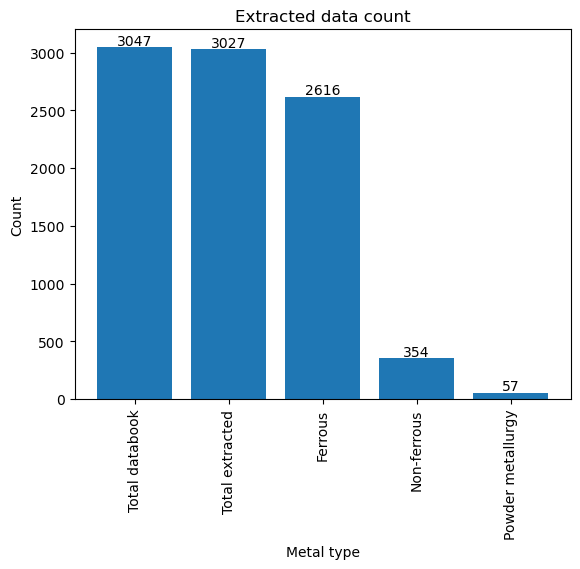

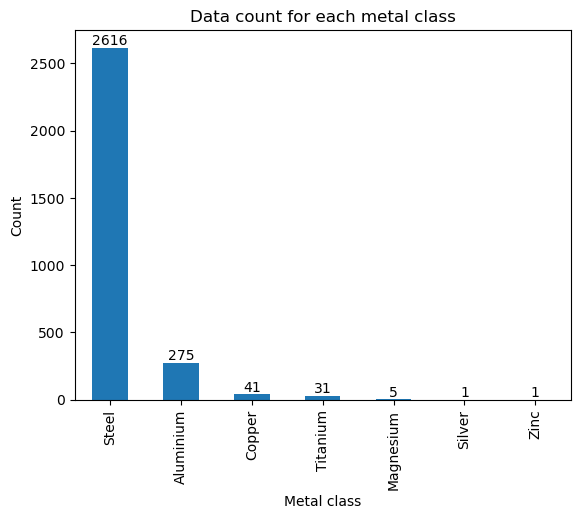

In [162]:
ferrous_count = len(data_ferrous)
nonferrous_count = len(data_nonferrous)
powdermetallurgy_count = len(data_powdermetallurgy)
total_count = ferrous_count + nonferrous_count + powdermetallurgy_count

metal_dic = {'Total databook': 3047,'Total extracted': total_count, 'Ferrous': ferrous_count, 'Non-ferrous': nonferrous_count, 'Powder metallurgy': powdermetallurgy_count}
keys = list(metal_dic.keys())
values = list(metal_dic.values())

plt.bar(keys,values)
plt.xlabel('Metal type')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Extracted data count')
for i, count in enumerate(values):
    plt.text(i, count + 20, str(count), ha='center')
plt.show()


df = pd.concat((data_ferrous['Material'],data_nonferrous['Material']),axis=0,ignore_index=True)
counts = df.value_counts()
counts.plot(kind='bar')
plt.xlabel('Metal class')
plt.ylabel('Count')
plt.title('Data count for each metal class')
for i, count in enumerate(counts):
    plt.text(i, count + 20, str(count), ha='center')
plt.show()


    

Column : Material_process

In [163]:
melting_method = ['melted by converter','melted by electric arc furnace','melted in vaccum','melted by open furnace']
working_process = ['hot rolled','cast','die cast','forged','cold worked','extruded','swaged','special form']
microstructure = ['rimmed','semi-killed','killed']
shape = ['round bar','plate','wire','tube','square bar']  

data_ferrous['Melting method'] = data_ferrous['Material_process'].map(lambda x: find_string(x,melting_method))
data_nonferrous['Melting method'] = data_nonferrous['Material_process'].map(lambda x: find_string(x,melting_method))

data_ferrous['Working process'] = data_ferrous['Material_process'].map(lambda x: find_string(x,working_process))
data_nonferrous['Working process'] = data_nonferrous['Material_process'].map(lambda x: find_string(x,working_process))

data_ferrous['Microstructure process'] = data_ferrous['Material_process'].map(lambda x: find_string(x,microstructure))
data_nonferrous['Microstructure process'] = data_nonferrous['Material_process'].map(lambda x: find_string(x,microstructure))

data_ferrous['Material_shape'] = data_ferrous['Material_process'].map(lambda x: find_string(x,shape))
data_nonferrous['Material_shape'] = data_nonferrous['Material_process'].map(lambda x: find_string(x,shape))

Column : Material_size

In [164]:
def materialsize_col_transform(df):
    df['Material_size'] = df['Material_size'].str.replace('\n', ' ')
    df['Material_size_diameter(mm)'] = df['Material_size'].apply(lambda x: number_extraction_afterstring(x, "DIAMETER (mm) : "))
    df['Material_size_thickness(mm)'] = df['Material_size'].apply(lambda x: number_extraction_afterstring(x, "THICKNESS (mm) : "))
    df['Material_size_width(mm)'] = df['Material_size'].apply(lambda x: number_extraction_afterstring(x, "WIDTH (mm) : "))

In [165]:
materialsize_col_transform(data_ferrous)
materialsize_col_transform(data_nonferrous)

Columns : Chemical compositions

In [166]:
# Function to transform 'A1' string to 'Al' in Al column of the dataframe
def Al_col_transform(df):
    for i in range(len(df)):
        a = df.at[i, 'Al']
        if a is not None:
            a = list(str(a))  # Convert the string to a list of characters to modify it
            #print(a)
            for j in range(1,len(a)):
                #print(a[j])
                if (a[j-1]=='A' and a[j] == '1'):
                    a[j] = 'l'
            df.at[i, 'Al'] = ''.join(a)

In [167]:
Al_col_transform(data_ferrous)
Al_col_transform(data_nonferrous)

In [168]:
for i in range(len(data_ferrous)):
    sum = 0
    for col in data_ferrous[['C','Si','Mn','P','S','Ni','Cr','Mo','V','Cu','Al','Ti','CHEM_13','CHEM_14']].columns:
        cell = str(data_ferrous[col][i])
        if cell is not None:
            sum = np.sum(data_ferrous.loc[i,['C','Si','Mn','P','S','Ni','Cr','Mo','V','Cu','Al','Ti','CHEM_13','CHEM_14']].map(keep_only_numbers), axis =0)
            data_ferrous.loc[i,'Fe'] = 100-sum
            for key in ['Al','Cu','Fe','Mg','Mn','Si','Sn','Zn','Cr','Ni','Ti','Zr','Na','Pb','Mo','Nb','Co','V','C','N','B','P','S']:
                if key in cell:
                    data_ferrous.loc[i,key] = str(keep_only_numbers(cell))
                    break


for i in range(len(data_nonferrous)):
    sum = 0
    for col in data_nonferrous[['Al','Cu','Fe','Mg','Mn','Si','Sn','Zn','CHEM_9','CHEM_10','CHEM_11','CHEM_12','CHEM_13','CHEM_14']].columns:
        cell = str(data_nonferrous[col][i])
        if cell is not None:
            if 'R' in cell:
                sum = np.sum(data_nonferrous.loc[i,['Al','Cu','Fe','Mg','Mn','Si','Sn','Zn','CHEM_9','CHEM_10','CHEM_11','CHEM_12','CHEM_13','CHEM_14']].map(keep_only_numbers), axis=0)
                data_nonferrous.loc[i,col] = 100-sum
            else:
                for key in ['Al','Cu','Fe','Mg','Mn','Si','Sn','Zn','Cr','Ni','Ti','Zr','Na','Pb','Mo','Nb','Co','V','C','N','B','P','S']:
                    if key in cell:
                        data_nonferrous.loc[i,key] = str(keep_only_numbers(cell))
                        break

C:\Users\ngc2kor\AppData\Local\Temp\ipykernel_7136\1340548070.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.207' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_ferrous.loc[i,key] = str(keep_only_numbers(cell))


In [169]:
data_ferrous[['Fe','C','Si','Mn','P','S','Ni','Cr','Mo','V','Cu','Al','Ti','Mg','Sn','Zr','Nb','Co','N','B']] = data_ferrous[['Fe','C','Si','Mn','P','S','Ni','Cr','Mo','V','Cu','Al','Ti','Mg','Sn','Zr','Nb','Co','N','B']].map(keep_only_numbers)  

data_nonferrous[['Al','Cu','Fe','Mg','Mn','Si','Sn','Zn','Cr','Ni','Ti','Zr','Na','Pb','V','C','N','B','P']] = data_nonferrous[['Al','Cu','Fe','Mg','Mn','Si','Sn','Zn','Cr','Ni','Ti','Zr','Na','Pb','V','C','N','B','P']].map(keep_only_numbers)


Column : HT_Geometry 

In [170]:
def column_HT_Geometry(df):
    df['HT_Geometry_size'] = df['HT_Geometry'].map(keep_only_numbers)
    for i in range(len(df)):
        if df['Material_shape'][i] in ['round bar','wire','tube']:
            df.loc[i,'HT_Geometry_diameter'] = df.loc[i,'HT_Geometry_size']
            #df.loc[i,'HT_Geometry_thickness'] = 0
        elif df['Material_shape'][i] in ['plate','square bar']:
            #df.loc[i,'HT_Geometry_diameter'] = 0
            df.loc[i,'HT_Geometry_thickness'] = df.loc[i,'HT_Geometry_size']
        else:
            df.loc[i,'HT_Geometry_diameter'] = None
            df.loc[i,'HT_Geometry_thickness'] = None

In [171]:
column_HT_Geometry(data_ferrous)
column_HT_Geometry(data_nonferrous)

Column : HT_Hardness

In [172]:
def col_HT_Hardness_transform(df):
    df['HT_Hardness_Mean'] = df['HT_Hardness'].apply(lambda x: number_extraction_afterstring(x, "MEAN VALUE : "))
    df['HT_Hardness_C.V'] = df['HT_Hardness'].apply(lambda x: number_extraction_afterstring(x, "C.V. : "))
    df['HT_Hardness_Sample_Size'] = df['HT_Hardness'].apply(lambda x: number_extraction_afterstring(x, "SAMPLE SIZE : "))
    

In [173]:
col_HT_Hardness_transform(data_ferrous)
col_HT_Hardness_transform(data_nonferrous)

Column : HT_Grain_size

In [174]:
data_ferrous['HT_Grain_size'] = data_ferrous['HT_Grain_size'].map(keep_only_numbers)
data_nonferrous['HT_Grain_size'] = data_nonferrous['HT_Grain_size'].map(keep_only_numbers)

Column : HT_process

In [175]:
data_ferrous = normalise_dic(data_ferrous,'HT_process')
data_nonferrous = normalise_dic(data_nonferrous,'HT_process')

col_name = {'TEMP.(deg C)_1ST':'HT_TEMP.(deg C)_1ST','TIME (h)_1ST':'HT_TIME (h)_1ST','COOLING_1ST':'HT_COOLING_1ST','TEMP.(deg C)_2ND':'HT_TEMP.(deg C)_2ND','TIME (h)_2ND':'HT_TIME (h)_2ND','COOLING_2ND':'HT_COOLING_2ND',
            'TEMP.(deg C)_3RD':'HT_TEMP.(deg C)_3RD','TIME (h)_3RD':'HT_TIME (h)_3RD','COOLING_3RD':'HT_COOLING_3RD','TEMP.(deg C)_4TH':'HT_TEMP.(deg C)_4TH','TIME (h)_4TH':'HT_TIME (h)_4TH','COOLING_4TH':'HT_COOLING_4TH'}

data_ferrous = data_ferrous.rename(columns=col_name)
data_nonferrous = data_nonferrous.rename(columns=col_name)


Column : TT_Direction

In [176]:
string_list = ['LT','LL','TL','TT','SS','LS','TS','SL','ST']
data_ferrous['TT_Direction'] = data_ferrous['TT_Direction'].map(lambda x: find_string(x,string_list))
data_nonferrous['TT_Direction'] = data_nonferrous['TT_Direction'].map(lambda x: find_string(x,string_list))

Column : TT_Type

In [177]:
def tt_type(df):
    materials = ['JIS','AISI','AMS','API','ASTM','BS','CM','IJIS','JASO','JES','NK','SAE']
    shapes = ['round bar','plate','wire','tube','square bar']
    
    df1 = df['TT_Type'].map(lambda x: find_string(x,materials))
    df2 = df['TT_Type'].map(keep_only_numbers)

    for i in range(len(df)):
        if df2[i] < 20 and df1[i] is not None:
            df.loc[i,'TT_material'] = df1[i] + ' ' + str(df2[i])
        else:
            df.loc[i,'TT_material'] = None
    
    df['TT_shape'] = df['TT_Type'].map(lambda x: find_string(x,shapes))

In [178]:
tt_type(data_ferrous)
tt_type(data_nonferrous)

Column : TT_Geometry

In [179]:
def col_TT_Geometry_transform(df):
    df['TT_Geometry'] = df['TT_Geometry'].str.replace('\n',' ')
    df['TT_Geometry_Diameter(mm)'] = df['TT_Geometry'].apply(lambda x: number_extraction_afterstring(x, "DIAMETER (mm) : "))
    df['TT_Geometry_Gauge length(mm)'] = df['TT_Geometry'].apply(lambda x: number_extraction_afterstring(x, "GAGE LENGTH (mm) : "))
    df['TT_Geometry_Sample size'] = df['TT_Geometry'].apply(lambda x: number_extraction_afterstring(x, "SAMPLE SIZE : "))
    df['TT_Geometry_Thickness(mm)'] = df['TT_Geometry'].apply(lambda x: number_extraction_afterstring(x, "THICKNESS (mm) : "))
    df['TT_Geometry_Width(mm)'] = df['TT_Geometry'].apply(lambda x: number_extraction_afterstring(x, "WIDTH (mm) : "))

    for i in range(len(df)):
        if df['TT_shape'][i] in ['round bar','wire']:
            df.loc[i,'TT_Geometry_Thickness(mm)'] = 0
            df.loc[i,'TT_Geometry_Width(mm)'] = 0
        elif df['TT_shape'][i] in ['plate','square bar']:
            df.loc[i,'TT_Geometry_Diameter(mm)'] = 0

In [180]:
col_TT_Geometry_transform(data_ferrous)
col_TT_Geometry_transform(data_nonferrous)

Column : TT_results

In [181]:
data_ferrous = normalise_dic(data_ferrous,'TT_results')
data_nonferrous = normalise_dic(data_nonferrous,'TT_results')

col_name = {'U.Yield Stress (MPa)_mean':'TT_U.Yield Stress (MPa)_mean', 'Tensile Stress (MPa)_mean':'TT_Tensile Stress (MPa)_mean','Elongation (%)_mean':'TT_Elongation (%)_mean', 'Reduction of Area (%)_mean':'TT_Reduction of Area (%)_mean',
       'U.Yield Stress (MPa)_cv':'TT_U.Yield Stress (MPa)_cv', 'Tensile Stress (MPa)_cv':'TT_Tensile Stress (MPa)_cv','Elongation (%)_cv':'TT_Elongation (%)_cv', 'Reduction of Area (%)_cv':'TT_Reduction of Area (%)_cv'}

data_ferrous = data_ferrous.rename(columns=col_name)
data_nonferrous = data_nonferrous.rename(columns=col_name)

Column : ImpT_by

In [182]:
string_list = ['Charpy','Izot']
data_ferrous['ImpT_by'] = data_ferrous['ImpT_by'].map(lambda x: find_string(x,string_list))
data_nonferrous['ImpT_by'] = data_nonferrous['ImpT_by'].map(lambda x: find_string(x,string_list))

Column : ImpT_results

In [183]:
data_ferrous = normalise_dic(data_ferrous,'ImpT_results')
data_nonferrous = normalise_dic(data_nonferrous,'ImpT_results')

drop_col = ['Mean Value', 'C.V.', 'Sample Size']

data_ferrous = data_ferrous.drop(drop_col,axis=1)
data_nonferrous = data_nonferrous.drop(drop_col,axis=1)

col_name = {'U.Yield Stress (MPa)_mean':'ImpT_Mean Value','Tensile Stress (MPa)_mean':'ImpT_C.V.', 'Elongation (%)_mean':'ImpT_Sample Size'}

data_ferrous = data_ferrous.rename(columns=col_name)
data_nonferrous = data_nonferrous.rename(columns=col_name)

Column : Fat_spec_Direction

In [184]:
string_list = ['LT','LL','TL','TT','SS','LS','TS','SL','ST']
data_ferrous['Fat_spec_Direction'] = data_ferrous['Fat_spec_Direction'].map(lambda x: find_string(x,string_list))
data_nonferrous['Fat_spec_Direction'] = data_nonferrous['Fat_spec_Direction'].map(lambda x: find_string(x,string_list))

Column : Fat_spec_Geo_Type

In [185]:
notch = ['smooth','hourglass','round notch','single notch','double notch','center notch','fillet','press fitted']
shapes = ['round bar','plate','wire','tube','square bar']  

data_ferrous['Fat_spec_notch'] = data_ferrous['Fat_spec_Geo_Type'].map(lambda x: find_string(x,notch))
data_nonferrous['Fat_spec_notch'] = data_nonferrous['Fat_spec_Geo_Type'].map(lambda x: find_string(x,notch))

data_ferrous['Fat_spec_shape'] = data_ferrous['Fat_spec_Geo_Type'].map(lambda x: find_string(x,shapes))
data_nonferrous['Fat_spec_shape'] = data_nonferrous['Fat_spec_Geo_Type'].map(lambda x: find_string(x,shapes))

Column : Fat_spec_Geo_top

In [186]:
def col_Fat_spec_Geo_top_transform(df):
    df['Fat_spec_Geo_top'] = df['Fat_spec_Geo_top'].str.replace('\n', ' ')
    df['Fat_spec_Geo_Tested Diameter(mm)'] = df['Fat_spec_Geo_top'].apply(lambda x: number_extraction_afterstring(x, "TESTED DIAMETER (mm) : ")) 
    df['Fat_spec_Geo_Chucked Diameter(mm)'] = df['Fat_spec_Geo_top'].apply(lambda x: number_extraction_afterstring(x, "CHUCKED DIAMETER (mm) : ")) 
    df['Fat_spec_Geo_Thickness(mm)'] = df['Fat_spec_Geo_top'].apply(lambda x: number_extraction_afterstring(x, "THICKNESS (mm) : ")) 
    df['Fat_spec_Geo_Tested Width(mm)'] = df['Fat_spec_Geo_top'].apply(lambda x: number_extraction_afterstring(x, "TESTED WIDTH (mm) : "))
    df['Fat_spec_Geo_Chucked Width(mm)'] = df['Fat_spec_Geo_top'].apply(lambda x: number_extraction_afterstring(x, "CHUCKED WIDTH (mm) : "))

    for i in range(len(df)):
        if df['Fat_spec_shape'][i] in ['round bar','wire']:
            df.loc[i,'Fat_spec_Geo_Thickness(mm)'] = 0
            df.loc[i,'Fat_spec_Geo_Tested Width(mm)'] = 0
            df.loc[i,'Fat_spec_Geo_Chucked Width(mm)'] = 0
        elif df['Fat_spec_shape'][i] in ['square bar','plate']:
            df.loc[i,'Fat_spec_Geo_Tested Diameter(mm)'] = 0
            df.loc[i,'Fat_spec_Geo_Chucked Diameter(mm)'] = 0
        elif df['Fat_spec_shape'][i] == 'tube':
            df.loc[i,'Fat_spec_Geo_Tested Width(mm)'] = 0
            df.loc[i,'Fat_spec_Geo_Chucked Width(mm)'] = 0


In [187]:
col_Fat_spec_Geo_top_transform(data_ferrous)
col_Fat_spec_Geo_top_transform(data_nonferrous)

Column: Fat_spec_Geo_bottom

In [188]:
def col_Fat_spec_Geo_bottom_transform(df):
    df['Fat_spec_Geo_bottom'] = df['Fat_spec_Geo_bottom'].str.replace('\n', ' ')
    df['Fat_spec_Geo_bottom Notch Radius(mm)'] = df['Fat_spec_Geo_bottom'].apply(lambda x: number_extraction_afterstring(x, "NOTCH RADIUS (mm) : "))
    df['Fat_spec_Geo_bottom Notch Angle(deg.)'] = df['Fat_spec_Geo_bottom'].apply(lambda x: number_extraction_afterstring(x, "NOTCH ANGLE (deg. ) : ")) 

In [189]:
col_Fat_spec_Geo_bottom_transform(data_ferrous)
col_Fat_spec_Geo_bottom_transform(data_nonferrous)

Column : Fat_spec_StressConcentraionFactor

In [190]:
data_ferrous['Fat_spec_StressConcentraionFactor'] = data_ferrous['Fat_spec_StressConcentraionFactor'].map(keep_only_numbers)
data_nonferrous['Fat_spec_StressConcentraionFactor'] = data_nonferrous['Fat_spec_StressConcentraionFactor'].map(keep_only_numbers)

Column : Fat_spec_StressConcentrationFactor_from

In [191]:
string_list = ['diagram','calculated','measured']
data_ferrous['Fat_spec_StressConcentrationFactor_from'] = data_ferrous['Fat_spec_StressConcentrationFactor_from'].map(lambda x: find_string(x,string_list))
data_nonferrous['Fat_spec_StressConcentrationFactor_from'] = data_nonferrous['Fat_spec_StressConcentrationFactor_from'].map(lambda x: find_string(x,string_list))

Column : Fat_spec_surface

In [192]:
case_hardening = ['induction hardened','nitrided','carburized','tufftrided','shot peened','treated']  # method of case hardening
surface_finish = ['tool cutting','polished by emery','electro-polished','ground','buffed','as received']  # method of surface finish  

data_ferrous['Fat_spec_Method of case hardening'] = data_ferrous['Fat_spec_surface'].map(lambda x: find_string(x,case_hardening))       
data_ferrous['Fat_spec_Method of surface finish'] = data_ferrous['Fat_spec_surface'].map(lambda x: find_string(x,surface_finish))

data_nonferrous['Fat_spec_Method of case hardening'] = data_nonferrous['Fat_spec_surface'].map(lambda x: find_string(x,case_hardening))
data_nonferrous['Fat_spec_Method of surface finish'] = data_nonferrous['Fat_spec_surface'].map(lambda x: find_string(x,surface_finish))

Column : Fat_spec_Hardness

In [193]:
data_ferrous['Fat_spec_Hardness'] = data_ferrous['Fat_spec_Hardness'].map(keep_only_numbers)
data_nonferrous['Fat_spec_Hardness'] = data_nonferrous['Fat_spec_Hardness'].map(keep_only_numbers)

Column : Fat_spec_roughness

In [194]:
data_ferrous['Fat_spec_roughness'] = data_ferrous['Fat_spec_roughness'].map(keep_only_numbers)
data_nonferrous['Fat_spec_roughness'] = data_nonferrous['Fat_spec_roughness'].map(keep_only_numbers)

Column : Fat_spec_HT

In [195]:
data_ferrous = normalise_dic(data_ferrous,'Fat_spec_HT')
data_nonferrous = normalise_dic(data_nonferrous,'Fat_spec_HT')

col_name = {'TEMP.(deg C)_1ST':'Fat_spec_TEMP.(deg C)_1ST', 'TIME (h)_1ST':'Fat_spec_TIME (h)_1ST','ATMOSPHERE_1ST':'Fat_spec_ATMOSPHERE_1ST','COOLING_1ST': 'Fat_spec_COOLING_1ST',
       'TEMP.(deg C)_2ND':'Fat_spec_TEMP.(deg C)_2ND','TIME (h)_2ND': 'Fat_spec_TIME (h)_2ND','ATMOSPHERE_2ND':'Fat_spec_ATMOSPHERE_2ND','COOLING_2ND':'Fat_spec_COOLING_2ND'}

data_ferrous = data_ferrous.rename(columns=col_name)
data_nonferrous = data_nonferrous.rename(columns=col_name)

Column : FT_control

In [196]:
string_list = ['load','strain','displacement']
data_ferrous['FT_control'] = data_ferrous['FT_control'].map(lambda x: find_string(x,string_list))
data_nonferrous['FT_control'] = data_nonferrous['FT_control'].map(lambda x: find_string(x,string_list))

Column : FT_definition_failure

In [197]:
def col_FT_definition_failure(df):
    string_list = ['break down','crack length','stiffness reduction']
    df['FT_failure_type'] = df['FT_definition_failure'].map(lambda x: find_string(x,string_list))
    df['FT_crack length value(mm)'] = df['FT_definition_failure'].map(lambda x: number_extraction_afterstring(x,'crack length (mm) : '))
    df['FT_reduction ratio value'] = df['FT_definition_failure'].map(lambda x: number_extraction_afterstring(x,'stiffness reduction (8) : '))

    for i in range(len(df)):
        if df['FT_failure_type'][i] == 'break down':
            df.loc[i,'FT_crack length value(mm)'] = 0
            df.loc[i,'FT_reduction ratio value'] = 0
        elif df['FT_failure_type'][i] == 'crack length':
            df.loc[i,'FT_reduction ratio value'] = 0
        elif df['FT_failure_type'][i] == 'stiffness reduction':
            df.loc[i,'FT_crack length value(mm)'] = 0

In [198]:
col_FT_definition_failure(data_ferrous)
col_FT_definition_failure(data_nonferrous)

Column: FT_frequency

In [199]:
data_ferrous['FT_frequency'] = data_ferrous['FT_frequency'].map(keep_only_numbers)
data_nonferrous['FT_frequency'] = data_nonferrous['FT_frequency'].map(keep_only_numbers)

Column : FT_load_machine

In [200]:
string_list = ['axial loading','bending of round bar','in-plane bending of plate','out-of-plane bending of plate','rotating bending cantilever','rotating uniform bending','torsion']
data_ferrous['FT_load_machine'] = data_ferrous['FT_load_machine'].map(lambda x: find_string(x,string_list)) 
data_nonferrous['FT_load_machine'] = data_nonferrous['FT_load_machine'].map(lambda x: find_string(x,string_list)) 

Column : FT_load_type

In [201]:
def col_FT_load_type(df):
    string_list = ['CONSTANT MEAN STRESS','CONSTANT MAXIMUM STRESS','CONSTANT MINIMUM STRESS','CONSTANT STRESS RATIO']
    df['FT_loadtype'] = df['FT_load_type'].map(lambda x: find_string(x,string_list))
    df['FT_load_value'] = df['FT_load_type'].map(keep_only_numbers)

In [202]:
col_FT_load_type(data_ferrous)
col_FT_load_type(data_nonferrous)

Column : FT_number_machines

In [203]:
data_ferrous['FT_number_machines'] = data_ferrous['FT_number_machines'].map(keep_only_numbers)
data_nonferrous['FT_number_machines'] = data_nonferrous['FT_number_machines'].map(keep_only_numbers)

Column : FT_Environment

In [204]:
data_ferrous = normalise_dic(data_ferrous,'FT_Environment')
data_nonferrous = normalise_dic(data_nonferrous,'FT_Environment')

col_name = {'T':'FT_Env_T','U': 'FT_Env_U','M':'FT_Env_M'}

data_ferrous = data_ferrous.rename(columns=col_name)
data_ferrous = data_ferrous.drop(['TEMP. (deg C)','HUMIDITY (%)','ATMOSPHERE'],axis=1)
data_nonferrous = data_nonferrous.rename(columns=col_name)
data_nonferrous = data_nonferrous.drop(['TEMP. (deg C)','HUMIDITY (%)','ATMOSPHERE'],axis=1)

Column : Fatigue_Test_Type

In [205]:
string_list = ['S-N','P-N','S-T']
data_ferrous['Type of data'] = data_ferrous['Fatigue_Test_Type'].map(lambda x: find_string(x,string_list))
data_nonferrous['Type of data'] = data_nonferrous['Fatigue_Test_Type'].map(lambda x: find_string(x,string_list))

data_ferrous['Type of data'] = data_ferrous['Type of data'].str.replace('-','')
data_nonferrous['Type of data'] = data_nonferrous['Type of data'].str.replace('-','')

Keeping only SN type data

In [206]:
index_dataferrous = pd.read_csv(r"C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\06_Index Data\JSMS_Index_ferr.csv")
index_datanonferrous = pd.read_csv(r"C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\06_Index Data\JSMS_Index_non-ferr.csv")

In [207]:
def test_type(df,index_df):
    for i in range(len(df)):
        condition = False
        for j in range(len(index_df)):
            if df['CodeSeries'][i] == index_df['Code-series'][j]:
                df.loc[i,'Type of test'] = index_df['Type of Data'][j]
                condition = True
        if condition == False:
            df.loc[i,'Type of test'] = None

    for i in range(len(df)):
        if df['Type of test'][i] is None:
            df.loc[i,'Type of test'] = df['Type of data'][i]

In [208]:
test_type(data_ferrous,index_dataferrous)
test_type(data_nonferrous,index_datanonferrous)

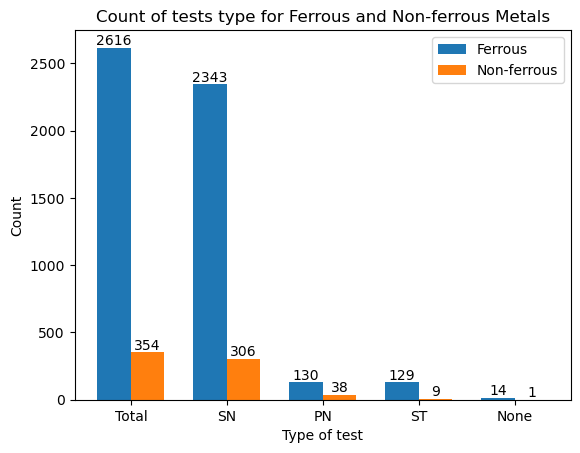

In [209]:
count_ferrous = data_ferrous['Type of test'].value_counts(dropna=False)
count_nonferrous = data_nonferrous['Type of test'].value_counts(dropna=False)

ferrous_data = {'Total':len(data_ferrous), 'SN':count_ferrous.iloc[0], 'PN':count_ferrous.iloc[1], 'ST':count_ferrous.iloc[2], 'None':count_ferrous.iloc[3]}
nonferrous_data = {'Total':len(data_nonferrous), 'SN':count_nonferrous.iloc[0], 'PN':count_nonferrous.iloc[1], 'ST':count_nonferrous.iloc[2], 'None':count_nonferrous.iloc[3]}

bar_width =0.35
index = range(len(ferrous_data))

plt.bar(index, ferrous_data.values(), bar_width, label='Ferrous')
plt.bar([i + bar_width for i in index], nonferrous_data.values(), bar_width, label='Non-ferrous')

plt.xlabel('Type of test')
plt.ylabel('Count')
plt.title('Count of tests type for Ferrous and Non-ferrous Metals')
plt.xticks([i + bar_width /2 for i in index], ferrous_data.keys())
plt.legend()

for i, count in enumerate(ferrous_data.values()):
 plt.text(i , count +20, str(count), ha='center')

for i, count in enumerate(nonferrous_data.values()):
 plt.text(i + bar_width, count +20, str(count), ha='center')

plt.show()

In [210]:
steel = data_ferrous[data_ferrous['Material'] == 'Steel'].reset_index(drop=True)
aluminium = data_nonferrous[data_nonferrous['Material'] == 'Aluminium'].reset_index(drop=True)
copper = data_nonferrous[data_nonferrous['Material'] == 'Copper'].reset_index(drop=True)
titanium = data_nonferrous[data_nonferrous['Material'] == 'Titanium'].reset_index(drop=True)

count_steel = steel['Type of test'].value_counts(dropna=True)
count_aluminium = aluminium['Type of test'].value_counts(dropna=True)
count_copper = copper['Type of test'].value_counts(dropna=True)
count_titanium  = titanium ['Type of test'].value_counts(dropna=True)

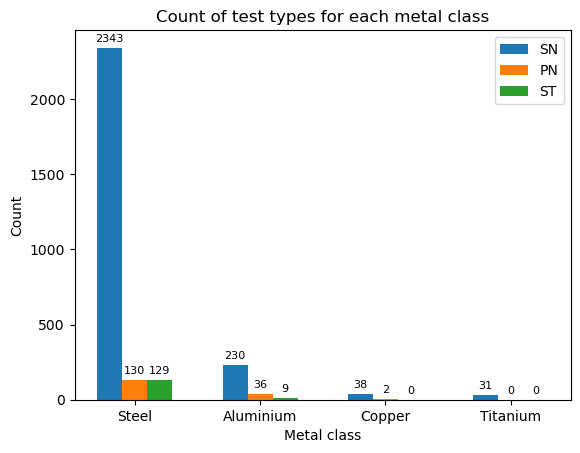

In [211]:
labels = ['Steel', 'Aluminium', 'Copper', 'Titanium']
SN = [count_steel.iloc[0], count_aluminium.iloc[0], count_copper.iloc[0], count_titanium.iloc[0]]
PN = [count_steel.iloc[1], count_aluminium.iloc[1], count_copper.iloc[1], 0]
ST = [count_steel.iloc[2], count_aluminium.iloc[2], 0, 0]

x = range(len(labels))

fig, ax = plt.subplots()
bar1 = ax.bar(x, SN, width=0.2, label='SN')
bar2 = ax.bar([i +0.2 for i in x], PN, width=0.2, label='PN')
bar3 = ax.bar([i +0.4 for i in x], ST, width=0.2, label='ST')

ax.set_xlabel('Metal class')
ax.set_ylabel('Count')
ax.set_title('Count of test types for each metal class')
ax.set_xticks([i +0.2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height), xy=(bar.get_x() + bar.get_width() /2, height), xytext=(0,3),textcoords="offset points", ha='center', va='bottom',fontsize=8)

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.show()

In [139]:
# data_ferrous = data_ferrous[data_ferrous['Type of test'] == 'SN'].dropna(subset=['Type of test']).reset_index(drop=True)
# data_nonferrous = data_nonferrous[data_nonferrous['Type of test'] == 'SN'].dropna(subset=['Type of test']).reset_index(drop=True)

Column : Fatigue_Test_Results

In [212]:
def function(data):
    # Extracting numbers from the data
    sa_values = []
    nf_values = []
    for key, value in data.items():
        for subkey, subvalue in value.items():
            if 'Sa' in subkey:
                sa_values.append(subvalue)
            elif 'Nf' in subkey:
                nf_values.append(subvalue)
    return sa_values,nf_values


In [213]:
def function2(data):
    sa_averages = []
    nf_averages = []
    sa_page_numbers = []
    nf_page_numbers = []
    index = 0

    for key, value in data.items():
        for sub_key, sub_value in value.items():
            if isinstance(sub_value, list) and len(sub_value) >0:
                if 'Sa' in sub_key:
                    sa_page_numbers.append(int(sub_value[0]['pageNumber']))
                    polygon = sub_value[0]['polygon']
                    odd_indices = polygon[1::2]
                    average = np.mean(odd_indices)
                    sa_averages.append(float(average))
                elif 'Nf' in sub_key:
                    nf_page_numbers.append(int(sub_value[0]['pageNumber']))
                    polygon = sub_value[0]['polygon']
                    odd_indices = polygon[1::2]
                    average = np.mean(odd_indices)
                    nf_averages.append(float(average))

    smallest_size = min(len(sa_page_numbers), len(sa_averages), len(nf_averages))

    for i in range(1,smallest_size):
        a = abs(sa_page_numbers[i] - sa_page_numbers[i-1])
        b = abs(sa_averages[i] - sa_averages[i-1])
        c = abs(nf_averages[i] - nf_averages[i-1])

        if a == 0 and b < 0.2 and c < 0.2:
            index += 1
        elif a != 0:
            index += 1
        elif a == 0 and (b > 0.2 or c > 0.2):
            break
    # if index == 0:
    #     print(f'sa_page_numbers: {sa_page_numbers}')
    #     print(f'sa_averages: {sa_averages}')
    #     print(f'nf_averages: {nf_averages}')
    
    return index

In [214]:
def extract_numbers(input_string):
    input_string = input_string.replace('[',' ').replace(']',' ')
    numbers = re.findall(r'\d+\.\d+|\d+', input_string)
    if len(numbers) >= 2:
        return float(numbers[0]), float(numbers[1])
    elif len(numbers) == 1:
        return float(numbers[0]), None
    else:
        return None, None

In [215]:
def extract_numbers_and_letter(input_string):
   match = re.findall(r'(\d+(?:\.\d*)?)\s*E\s*(\d+)', input_string)
   if match:
      number_before_E = float(match[0][0])
      number_after_E = float(match[0][1])
      letter_R = find_string(input_string, ['R'])
      if letter_R == 'R':
         runout_failure = 'runout'
      else:
         runout_failure = 'failure'
      return float(number_before_E), float(number_after_E), runout_failure
   else:
      return None, None, None

In [216]:
def col_FT_results_transformation(df):
    for i in range(len(df)):
        if df['Fatigue_Test_Results'][i] is not None:
            df.loc[i, 'Fatigue_Test_Results'] = str(df['Fatigue_Test_Results'][i])
            try:
                data= json.loads(df['Fatigue_Test_Results'][i].replace("'", "\""))
            except json.JSONDecodeError as e:
                df.loc[i,'FT_results'] = None
                continue

            amplitude,cycles = function(data)
            amplitude_Mpa = []
            amplitude_Kgf = []
            num_cycles = []
            runout_failure = []

            length = min(len(amplitude), len(cycles))
            
            if amplitude is not None and cycles is not None:
                for j in range(length):
                    if amplitude[j] is not None and cycles[j] is not None:
                        amp_1, amp_2 = extract_numbers(amplitude[j])
                        a,b,c = extract_numbers_and_letter(cycles[j])
                        if a is not None and b is not None and c is not None and amp_1 is not None:
                            #num = a*(10**b)
                            num = str(a) + ' E' + str(int(b))
                            amplitude_Mpa.append(amp_1)
                            amplitude_Kgf.append(amp_2)
                            num_cycles.append(str(num))
                            runout_failure.append(c) 

                        # a,b,c = extract_numbers_and_letter(cycles[j])
                        # cly = cycles[j]
                        # if amp_1 is not None and cly is not None and c is not None:
                        #     amplitude_Mpa.append(amp_1)
                        #     amplitude_Kgf.append(amp_2)
                        #     num_cycles.append(cly)
                        #     runout_failure.append(c)

            if df['Fat_Test_Results_pos'][i] is not None:
                df.loc[i,'Fat_Test_Results_pos'] = str(df['Fat_Test_Results_pos'][i])
                data = json.loads(df['Fat_Test_Results_pos'][i].replace("'", "\""))
                index = function2(data)
                # if index == 0:
                #     print(f"Code: {df['CodeSeries'][i]}   Page: {df['Page'][i]}")
                #     print(f'amplitude_Mpa: {amplitude_Mpa}')
                #     print(f'runout_failure: {runout_failure}')
                amplitude_Mpa = amplitude_Mpa[ : index+1]
                num_cycles = num_cycles[ : index+1]
                runout_failure = runout_failure[ : index+1]

            dic = {'s_a':amplitude_Mpa, 'n':num_cycles, 'outcome':runout_failure}
            df.loc[i,'FT_results'] = str(dic)
        else:
            df.loc[i,'FT_results'] = None


In [217]:
col_FT_results_transformation(data_ferrous)
col_FT_results_transformation(data_nonferrous)

In [218]:
data_ferrous = data_ferrous.dropna(subset=['FT_results']).reset_index(drop=True)
data_nonferrous = data_nonferrous.dropna(subset=['FT_results']).reset_index(drop=True)

In [219]:
def test_type_outliers(df, name, con):
    indices = []
    for i in range(len(df)):
        string_data = df['FT_results'][i]
        if string_data is not None:
            dic = json.loads(string_data.replace("'", "\""))
            a = len(np.array(dic['s_a']))
            if a > 30:
                indices.append(i)
                if con is True:
                    print(df['Page'][i],df['CodeSeries'][i],dic['s_a'])
                    #print(df['Fat_Test_Results_pos'][i])
    print(f"No of outliers in {name}: {len(indices)}")
    return indices

In [ ]:
# ferrous_outliers = test_type_outliers(data_ferrous,'ferrous',True)
# nonferrous_outliers = test_type_outliers(data_nonferrous,'nonferrous',True)

Creating cleaned data file

In [220]:
col_order = ['Pdf_name', 'Azure_model', 'Page', 'All_Series', 'CodeSeries', 'MaterialNo', 'Year', 'JICSTNo','Material','Material_abbrevation','Material_symbol', 'Melting method','Working process','Microstructure process','Material_shape','Material_size_diameter(mm)','Material_size_thickness(mm)','Material_size_width(mm)','Manufacturer', 'Forging_ratio', 'Inclusions_DA', 'Inclusions_DB', 'Inclusions_DC', 'Inclusions_Total',
             'Fe','C','Si','Mn','P','S','Ni','Cr','Mo','V','Cu','Al','Ti','Mg','Sn','Zr','Nb','Co','N','B','HT_Geometry_diameter', 'HT_Geometry_thickness','HT_Hardness_Mean', 'HT_Hardness_C.V', 'HT_Hardness_Sample_Size','HT_TEMP.(deg C)_1ST', 'HT_TIME (h)_1ST', 'HT_COOLING_1ST', 'HT_TEMP.(deg C)_2ND', 'HT_TIME (h)_2ND', 'HT_COOLING_2ND', 'HT_TEMP.(deg C)_3RD', 'HT_TIME (h)_3RD', 'HT_COOLING_3RD', 'HT_TEMP.(deg C)_4TH', 'HT_TIME (h)_4TH', 'HT_COOLING_4TH',
             'TT_Direction','TT_material', 'TT_shape','TT_Geometry_Diameter(mm)', 'TT_Geometry_Gauge length(mm)', 'TT_Geometry_Sample size', 'TT_Geometry_Thickness(mm)', 'TT_Geometry_Width(mm)','TT_U.Yield Stress (MPa)_mean', 'TT_Tensile Stress (MPa)_mean', 'TT_Elongation (%)_mean', 'TT_Reduction of Area (%)_mean', 'TT_U.Yield Stress (MPa)_cv', 'TT_Tensile Stress (MPa)_cv', 'TT_Elongation (%)_cv', 'TT_Reduction of Area (%)_cv',
             'ImpT_by', 'ImpT_Type', 'ImpT_Mean Value', 'ImpT_C.V.', 'ImpT_Sample Size','Fat_spec_Direction', 'Fat_spec_notch','Fat_spec_shape','Fat_spec_Geo_Tested Diameter(mm)', 'Fat_spec_Geo_Chucked Diameter(mm)', 'Fat_spec_Geo_Thickness(mm)', 'Fat_spec_Geo_Tested Width(mm)', 'Fat_spec_Geo_Chucked Width(mm)',
             'Fat_spec_Geo_bottom Notch Radius(mm)', 'Fat_spec_Geo_bottom Notch Angle(deg.)','Fat_spec_StressConcentraionFactor', 'Fat_spec_StressConcentrationFactor_from', 'Fat_spec_Method of case hardening','Fat_spec_Method of surface finish', 'Fat_spec_Hardness', 'Fat_spec_roughness','Fat_spec_TEMP.(deg C)_1ST', 'Fat_spec_TIME (h)_1ST', 'Fat_spec_ATMOSPHERE_1ST', 'Fat_spec_COOLING_1ST', 'Fat_spec_TEMP.(deg C)_2ND', 'Fat_spec_TIME (h)_2ND', 'Fat_spec_ATMOSPHERE_2ND', 'Fat_spec_COOLING_2ND',
             'FT_control','FT_failure_type','FT_crack length value(mm)', 'FT_reduction ratio value','FT_frequency','FT_load_machine','FT_loadtype', 'FT_load_value','FT_number_machines', 'FT_Test_period', 'FT_Env_T', 'FT_Env_U', 'FT_Env_M','Type of test','FT_results']
data_ferrous = data_ferrous[col_order]
data_ferrous.to_csv(r'C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\03_Cleaned data\Version 3\Cleaned data ferrous_1.csv')
#data_ferrous.to_json(r'C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\03_Cleaned data\Version 3\Cleaned data ferrous_1.json')

col_order = ['Pdf_name', 'Azure_model', 'Page', 'All_Series', 'CodeSeries', 'MaterialNo', 'Year', 'JICSTNo','Material','Material_abbrevation','Material_symbol', 'Melting method','Working process','Microstructure process','Material_shape','Material_size_diameter(mm)','Material_size_thickness(mm)','Material_size_width(mm)','Manufacturer', 'Forging_ratio', 'Inclusions_DA', 'Inclusions_DB', 'Inclusions_DC', 'Inclusions_Total',
             'Al','Cu','Fe','Mg','Mn','Si','Sn','Zn','Cr','Ni','Ti','Zr','Na','Pb','V','C','N','B','P','HT_Geometry_diameter', 'HT_Geometry_thickness','HT_Hardness_Mean', 'HT_Hardness_C.V', 'HT_Hardness_Sample_Size','HT_TEMP.(deg C)_1ST', 'HT_TIME (h)_1ST', 'HT_COOLING_1ST', 'HT_TEMP.(deg C)_2ND', 'HT_TIME (h)_2ND', 'HT_COOLING_2ND', 'HT_TEMP.(deg C)_3RD', 'HT_TIME (h)_3RD', 'HT_COOLING_3RD', 'HT_TEMP.(deg C)_4TH', 'HT_TIME (h)_4TH', 'HT_COOLING_4TH',
             'TT_Direction','TT_material', 'TT_shape','TT_Geometry_Diameter(mm)', 'TT_Geometry_Gauge length(mm)', 'TT_Geometry_Sample size', 'TT_Geometry_Thickness(mm)', 'TT_Geometry_Width(mm)','TT_U.Yield Stress (MPa)_mean', 'TT_Tensile Stress (MPa)_mean', 'TT_Elongation (%)_mean', 'TT_Reduction of Area (%)_mean', 'TT_U.Yield Stress (MPa)_cv', 'TT_Tensile Stress (MPa)_cv', 'TT_Elongation (%)_cv', 'TT_Reduction of Area (%)_cv',
             'ImpT_by', 'ImpT_Type', 'ImpT_Mean Value', 'ImpT_C.V.', 'ImpT_Sample Size','Fat_spec_Direction', 'Fat_spec_notch','Fat_spec_shape','Fat_spec_Geo_Tested Diameter(mm)', 'Fat_spec_Geo_Chucked Diameter(mm)', 'Fat_spec_Geo_Thickness(mm)', 'Fat_spec_Geo_Tested Width(mm)', 'Fat_spec_Geo_Chucked Width(mm)',
             'Fat_spec_Geo_bottom Notch Radius(mm)', 'Fat_spec_Geo_bottom Notch Angle(deg.)','Fat_spec_StressConcentraionFactor', 'Fat_spec_StressConcentrationFactor_from', 'Fat_spec_Method of case hardening','Fat_spec_Method of surface finish', 'Fat_spec_Hardness', 'Fat_spec_roughness','Fat_spec_TEMP.(deg C)_1ST', 'Fat_spec_TIME (h)_1ST', 'Fat_spec_ATMOSPHERE_1ST', 'Fat_spec_COOLING_1ST', 'Fat_spec_TEMP.(deg C)_2ND', 'Fat_spec_TIME (h)_2ND', 'Fat_spec_ATMOSPHERE_2ND', 'Fat_spec_COOLING_2ND',
             'FT_control','FT_failure_type','FT_crack length value(mm)', 'FT_reduction ratio value','FT_frequency','FT_load_machine','FT_loadtype', 'FT_load_value','FT_number_machines', 'FT_Test_period', 'FT_Env_T', 'FT_Env_U', 'FT_Env_M','Type of test','FT_results']
data_nonferrous = data_nonferrous[col_order]
data_nonferrous.to_csv(r'C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\03_Cleaned data\Version 3\Cleaned data nonferrous_1.csv')
#data_nonferrous.to_json(r'C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\03_Cleaned data\Version 3\Cleaned data nonferrous_1.json')

Number of missing entries in each column

In [221]:
def per_null_entries(df,metal):
    # Calculate the percentage of none entries in each column
    none_percentage = (df.isnull().sum() / len(df)) * 100

    # Plot the percentage of none entries in each column
    none_percentage.plot(kind='bar', figsize=(30, 10))
    plt.title(f'{metal} percentage of misisng entries in each column')
    plt.xlabel('Columns')
    plt.xticks(rotation=90)
    plt.ylabel('Percentage')
    plt.axhline(y=50, color='r', linestyle='--')
    plt.show()

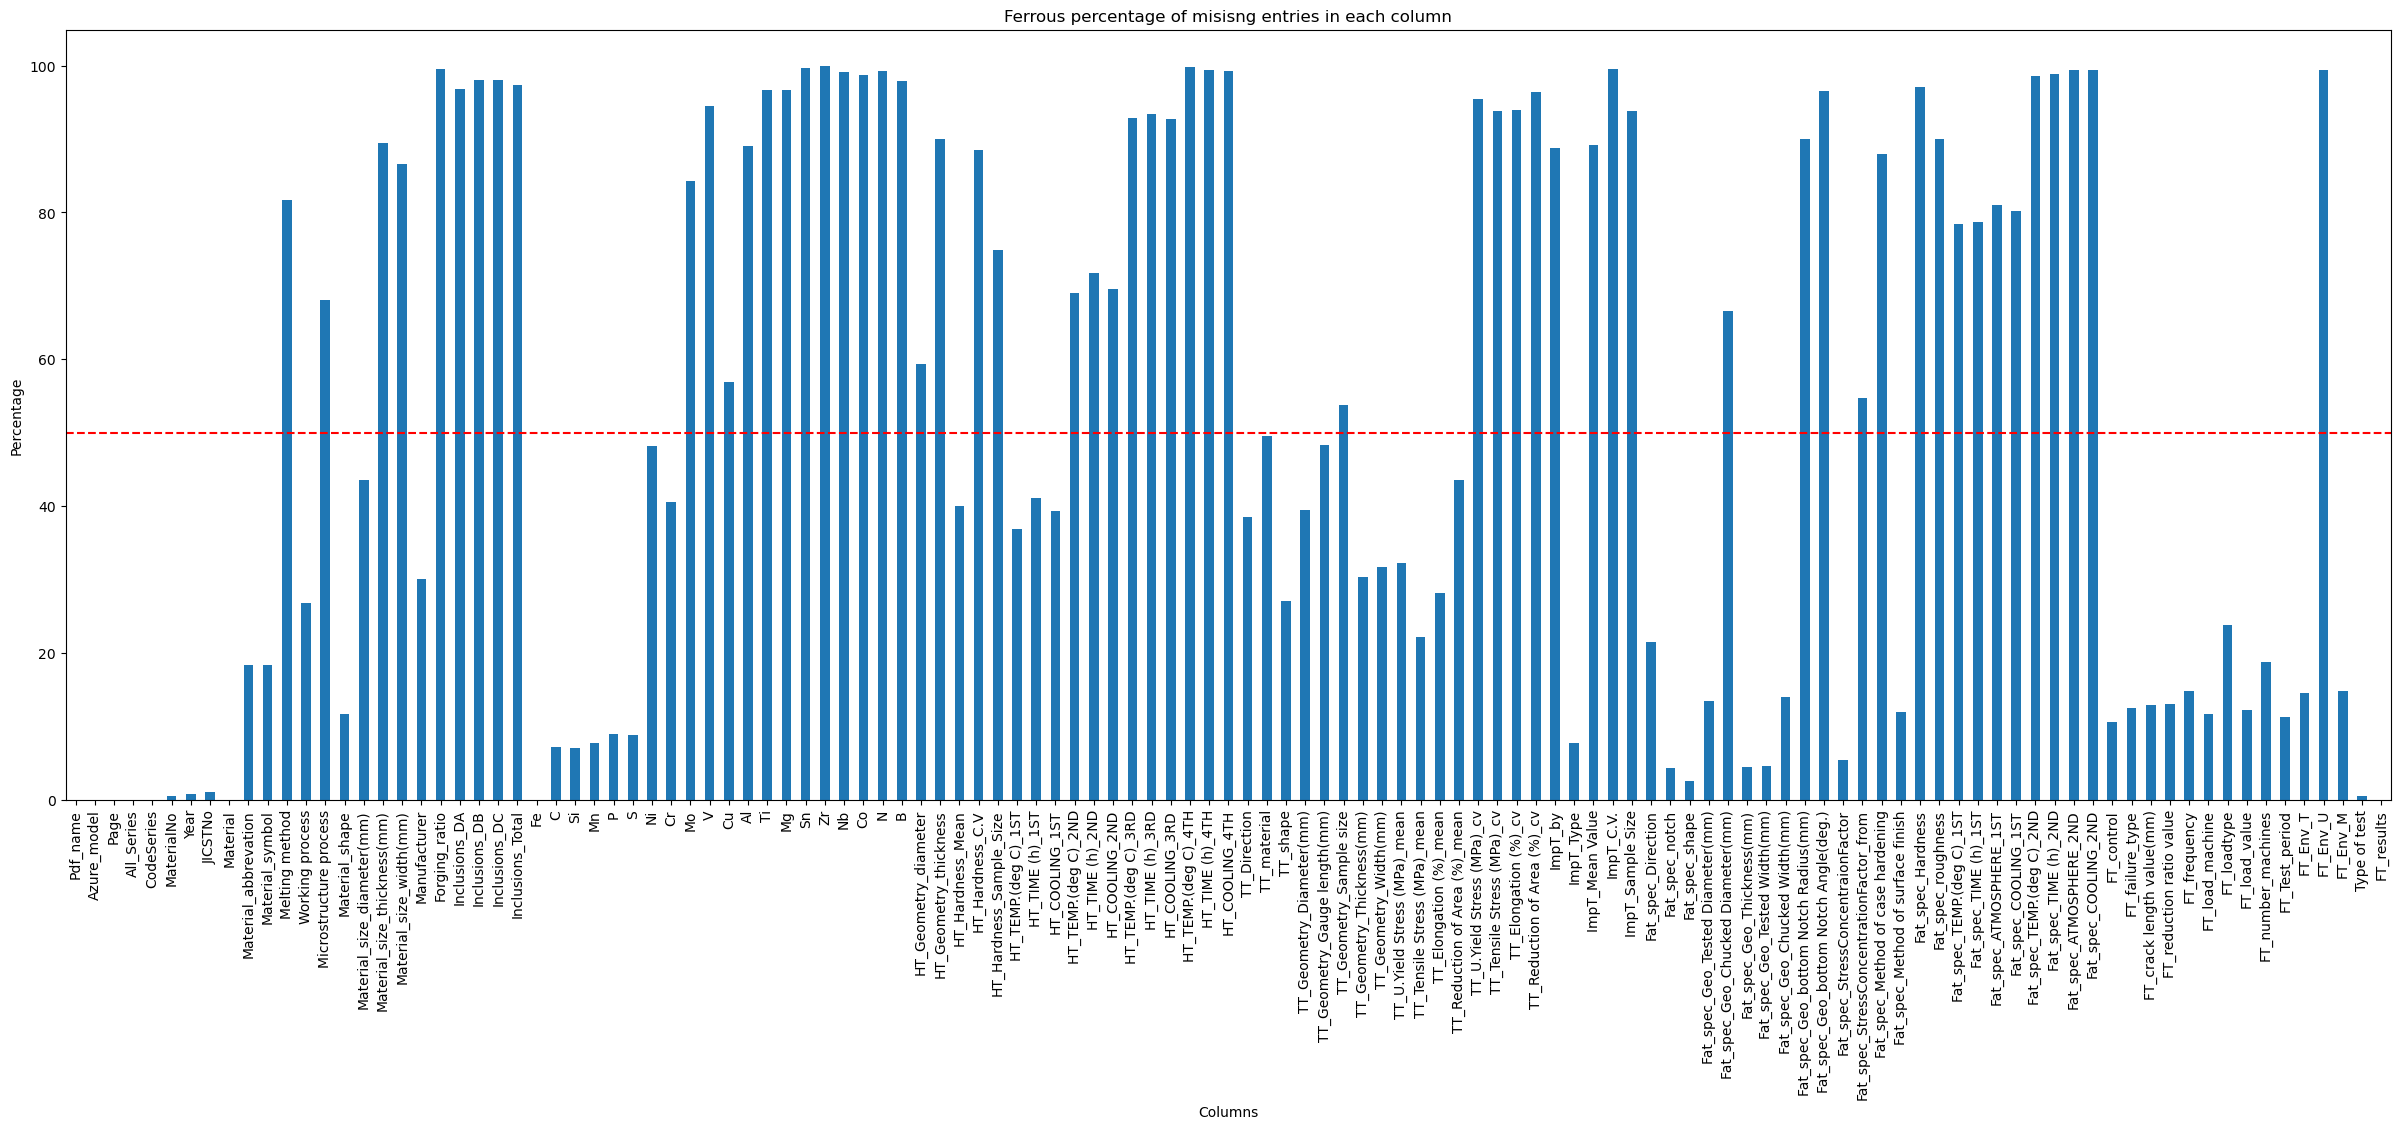

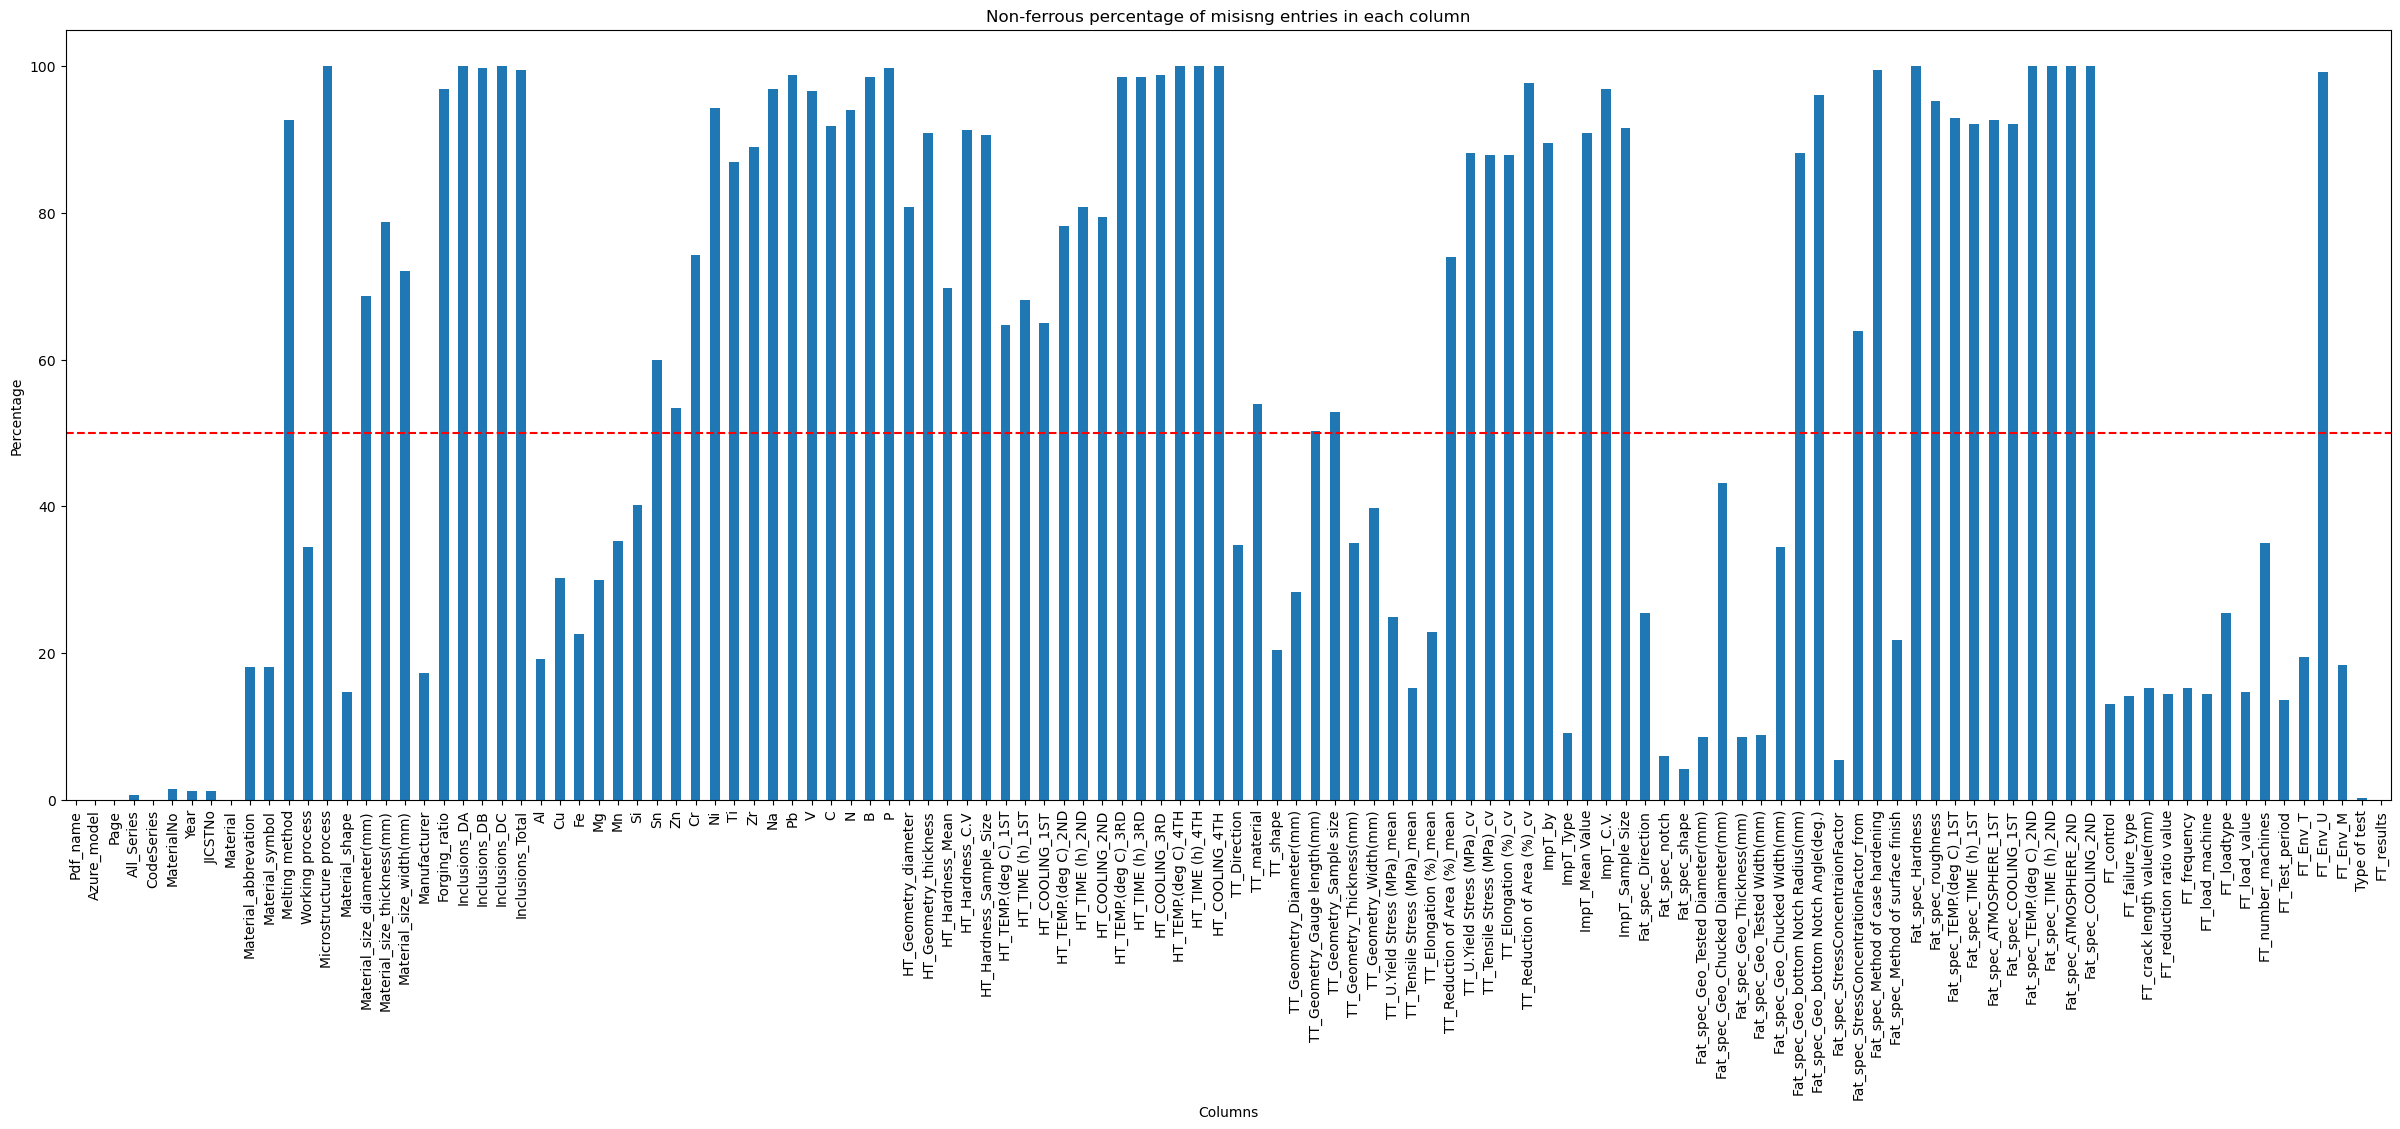

In [222]:
per_null_entries(data_ferrous,'Ferrous')
per_null_entries(data_nonferrous, 'Non-ferrous')

Selecting columns with sufficient data

In [223]:
ferrous_newcol = ['Page', 'CodeSeries', 'MaterialNo', 'Year', 'JICSTNo', 'Material','Material_abbrevation','Material_symbol','Working process', 'Material_shape', 'Material_size_diameter(mm)', 'Material_size_thickness(mm)', 'Material_size_width(mm)', 'Inclusions_DA', 'Inclusions_DB', 'Inclusions_DC', 'Inclusions_Total','Fe', 'C', 'Si', 'Mn', 'P', 'S', 'Ni', 'Cr', 'Mo', 'V', 'Cu', 'Al', 'Ti', 'Mg', 'Sn', 'Zr', 'Nb', 'Co', 'N', 'B','HT_Geometry_diameter', 'HT_Geometry_thickness','HT_TEMP.(deg C)_1ST', 'HT_TIME (h)_1ST', 'HT_COOLING_1ST','TT_Direction', 'TT_shape', 'TT_Geometry_Diameter(mm)', 'TT_Geometry_Gauge length(mm)','TT_Geometry_Thickness(mm)', 'TT_Geometry_Width(mm)','TT_U.Yield Stress (MPa)_mean', 'TT_Tensile Stress (MPa)_mean', 'TT_Elongation (%)_mean', 'TT_Reduction of Area (%)_mean','Fat_spec_Direction', 'Fat_spec_notch', 'Fat_spec_shape', 'Fat_spec_Geo_Tested Diameter(mm)', 'Fat_spec_Geo_Thickness(mm)', 'Fat_spec_Geo_Tested Width(mm)', 'Fat_spec_StressConcentraionFactor','Fat_spec_Method of surface finish' ,'FT_control', 'FT_failure_type', 'FT_crack length value(mm)', 'FT_reduction ratio value', 'FT_frequency', 'FT_load_machine', 'FT_loadtype', 'FT_load_value','FT_number_machines', 'FT_Test_period', 'FT_Env_T', 'FT_Env_M', 'Type of test','FT_results']
data_ferrous = data_ferrous[ferrous_newcol]
nonferrous_newcol = ['Page', 'CodeSeries', 'MaterialNo', 'Year', 'JICSTNo', 'Material','Material_abbrevation','Material_symbol','Working process', 'Material_shape', 'Material_size_diameter(mm)', 'Material_size_thickness(mm)', 'Material_size_width(mm)','Al', 'Cu', 'Fe', 'Mg', 'Mn', 'Si', 'Sn', 'Zn', 'Cr', 'Ni', 'Ti', 'Zr', 'Na', 'Pb', 'V', 'C', 'N', 'B', 'P','HT_Geometry_diameter', 'HT_Geometry_thickness','HT_TEMP.(deg C)_1ST', 'HT_TIME (h)_1ST', 'HT_COOLING_1ST','TT_Direction', 'TT_shape', 'TT_Geometry_Diameter(mm)', 'TT_Geometry_Gauge length(mm)','TT_Geometry_Thickness(mm)', 'TT_Geometry_Width(mm)','TT_U.Yield Stress (MPa)_mean', 'TT_Tensile Stress (MPa)_mean', 'TT_Elongation (%)_mean', 'TT_Reduction of Area (%)_mean','Fat_spec_Direction', 'Fat_spec_notch', 'Fat_spec_shape', 'Fat_spec_Geo_Tested Diameter(mm)', 'Fat_spec_Geo_Thickness(mm)', 'Fat_spec_Geo_Tested Width(mm)', 'Fat_spec_StressConcentraionFactor','Fat_spec_Method of surface finish','FT_control', 'FT_failure_type', 'FT_crack length value(mm)', 'FT_reduction ratio value', 'FT_frequency', 'FT_load_machine', 'FT_loadtype', 'FT_load_value','FT_number_machines', 'FT_Test_period', 'FT_Env_T', 'FT_Env_M', 'Type of test','FT_results']
data_nonferrous = data_nonferrous[nonferrous_newcol]

In [224]:
num_col_ferrous = ['Material_size_diameter(mm)', 'Material_size_thickness(mm)', 'Material_size_width(mm)', 'Inclusions_DA', 'Inclusions_DB', 'Inclusions_DC', 'Inclusions_Total','Fe', 'C', 'Si', 'Mn', 'P', 'S', 'Ni', 'Cr', 'Mo', 'V', 'Cu', 'Al', 'Ti', 'Mg', 'Sn', 'Zr', 'Nb', 'Co', 'N', 'B','HT_Geometry_diameter', 'HT_Geometry_thickness','HT_TEMP.(deg C)_1ST', 'HT_TIME (h)_1ST', 'TT_Geometry_Diameter(mm)', 'TT_Geometry_Gauge length(mm)','TT_Geometry_Thickness(mm)', 'TT_Geometry_Width(mm)','TT_U.Yield Stress (MPa)_mean', 'TT_Tensile Stress (MPa)_mean', 'TT_Elongation (%)_mean', 'TT_Reduction of Area (%)_mean','Fat_spec_Geo_Tested Diameter(mm)','Fat_spec_Geo_Thickness(mm)', 'Fat_spec_Geo_Tested Width(mm)', 'FT_frequency', 'FT_load_value','FT_number_machines']
num_col_nonferrous = ['Material_size_diameter(mm)', 'Material_size_thickness(mm)', 'Material_size_width(mm)','Al', 'Cu', 'Fe', 'Mg', 'Mn', 'Si', 'Sn', 'Zn', 'Cr', 'Ni', 'Ti', 'Zr', 'Na', 'Pb', 'V', 'C', 'N', 'B', 'P','HT_Geometry_diameter', 'HT_Geometry_thickness','HT_TEMP.(deg C)_1ST', 'HT_TIME (h)_1ST','TT_Geometry_Diameter(mm)', 'TT_Geometry_Gauge length(mm)','TT_Geometry_Thickness(mm)', 'TT_Geometry_Width(mm)','TT_U.Yield Stress (MPa)_mean', 'TT_Tensile Stress (MPa)_mean', 'TT_Elongation (%)_mean', 'TT_Reduction of Area (%)_mean','Fat_spec_Geo_Tested Diameter(mm)', 'Fat_spec_Geo_Thickness(mm)', 'Fat_spec_Geo_Tested Width(mm)','FT_frequency', 'FT_load_value', 'FT_number_machines']

data_ferrous[num_col_ferrous] = data_ferrous[num_col_ferrous].map(keep_only_numbers)
data_nonferrous[num_col_nonferrous] = data_nonferrous[num_col_nonferrous].map(keep_only_numbers)

In [225]:
data_ferrous.to_csv(r"C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\04_Reduced Data\Version 3\Reduced data ferrous_1.csv")
#data_ferrous.to_json(r"C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\04_Reduced Data\Version 3\Reduced data ferrous.json")

data_nonferrous.to_csv(r"C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\04_Reduced Data\Version 3\Reduced data nonferrous_1.csv")
#data_nonferrous.to_json(r"C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\04_Reduced Data\Version 3\Reduced data nonferrous.json")

Creating data file for different class of metals

In [226]:
data_steel = data_ferrous

data_aluminium = data_nonferrous[data_nonferrous['Material'] == 'Aluminium'].reset_index(drop=True)
data_copper = data_nonferrous[data_nonferrous['Material'] == 'Copper'].reset_index(drop=True)
data_titanium = data_nonferrous[data_nonferrous['Material'] == 'Titanium'].reset_index(drop=True)

In [227]:
data_steel.to_csv(r"C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\04_Reduced Data\Version 3\Data steel_1.csv")
#data_steel.to_json(r"C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\04_Reduced Data\Version 3\Data steel.json")

data_aluminium.to_csv(r"C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\04_Reduced Data\Version 3\Data aluminium_1.csv")
#data_aluminium.to_json(r"C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\04_Reduced Data\Version 3\Data aluminium.json")

data_copper.to_csv(r"C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\04_Reduced Data\Version 3\Data copper_1.csv")
#data_copper.to_json(r"C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\04_Reduced Data\Version 3\Data copper.json")

data_titanium.to_csv(r"C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\04_Reduced Data\Version 3\Data titanium_1.csv")
#data_titanium.to_json(r"C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\04_Reduced Data\Version 3\Data titanium.json")

DABEF Data

In [51]:
import ast
df= pd.read_excel(r"C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\04_Reduced Data\DABEF\Aluminium DABEF Data.xlsx")

In [52]:
for i  in range(len(DABEF_Alu)):
    lst = ast.literal_eval(df['Fracture_Runnout'][i])
    for j in range(len(lst)):
        if lst[j]==False:
            lst[j]='failure'
        elif lst[j]==True:
            lst[j]='runout'
    
    df.loc[i, 'FT_results'] = str({'s_a': ast.literal_eval(df['Amplitude'][i]), 'n': ast.literal_eval(df['Num cycles'][i]), 'outcome': lst})


In [54]:
df.to_excel(r"C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\04_Reduced Data\DABEF\Aluminium DABEF Data.xlsx")

In [37]:
df= pd.read_excel(r"C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\04_Reduced Data\01_Manual entry\Data Steel.xlsx")

In [38]:
def replace_scientific_notation_in_dict(input_dict):
    """
    Replace scientific notation strings in a dictionary with numerical values.
    
    Parameters:
        dictionary (dict): Dictionary containing potential scientific notation strings.
    
    Returns:
        dict: Updated dictionary with converted numerical values.
    """
    if 'n' in input_dict:
        input_dict['n'] = [float(value.replace(' E', 'e')) if isinstance(value, str) else value 
                           for value in input_dict['n']]
    return input_dict

In [42]:
for i in range(len(df)):
    b = str(df["FT_results"][i])
   
    dictionary = json.loads(b.replace("'", "\""))
    a = replace_scientific_notation_in_dict(dictionary)
    df.loc[i, "FT_results"] = str(a)

In [41]:
df.to_excel(r"C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\04_Reduced Data\01_Manual entry\Data Steel.xlsx")